In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
red = pd.read_csv('dataset/dataset/winequality-red.csv')
white = pd.read_csv('dataset/dataset/winequality-white.csv')

In [3]:
red.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


이 데이터는 세미콜론을 기점으로 데이터가 나뉘고 있다. (csv는 ',')  
read_csv 할 때 `sep = ":"` 속성 추가

In [4]:
red = pd.read_csv('dataset/dataset/winequality-red.csv', sep=";")
white = pd.read_csv('dataset/dataset/winequality-white.csv', sep=";")

In [5]:
display(red.head(3))
display(white.head(3))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


# 전처리

데이터를 받았을 때 독립과 종속을 생각해야 한다. 일반적으로 종속변수는 맨 앞 또는 맨 뒤에 위치하고 있으므로 살펴보자.  
acidity는 여러 종류가 있으므로 quality가 종속변수임을 알 수 있다.

## red와 white를 통합

- red data와 white data를 구분하기 위해 type 변수를 추가
- pd.concat 사용

In [6]:
red['type'] = 0
white['type'] = 1

In [7]:
display(red.head(2))
display(white.head(2))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,1


In [8]:
wine = pd.concat([red, white])

In [9]:
display(wine.sample(3))
display(wine.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
3741,7.0,0.15,0.28,14.7,0.051,29.0,149.0,0.99792,2.96,0.39,9.0,7,1
579,10.6,0.31,0.49,2.2,0.063,18.0,40.0,0.99760,3.14,0.51,9.8,6,0
1473,7.0,0.20,0.49,5.9,0.038,39.0,128.0,0.99380,3.21,0.48,10.8,6,1


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


**describe**

- 결측치는 없어 보인다

**독립변수 특징 확인**
- 데이터가 어떤 변수를 가지고있는지 확인해야 한다. : 도메인 지식이 중요한 이유
<br><br><img alt="wine features" src="img/wine_features.png">


## 데이터의 분포를 확인하기 위해 시각화

`sns.histplot()`

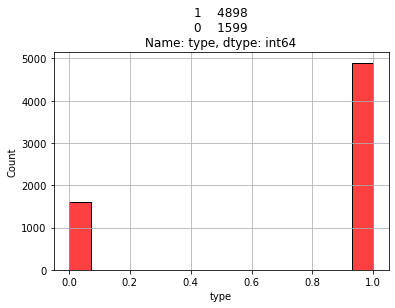

In [10]:
sns.histplot(wine['type'], color="red")
plt.title(f"{wine['type'].value_counts()}")

plt.grid()
plt.show()

3배정도의 데이터 개수 차이가 난다.  
이 편향을 용인하는 기준은 연구자마다 차이가 나는데 일반적으로 데이터 개수를 맞출 때 있는 데이터를 버리는게 아닌 부족한 데이터를 늘리는 방향으로 진행한다.

## 데이터 분할을 위한 shuffle

In [12]:
wine_shuffle = wine.sample(frac=1)
display(wine_shuffle.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2524,7.5,0.41,0.23,14.8,0.054,28.0,174.0,0.99898,3.18,0.49,9.7,5,1
107,6.2,0.63,0.31,1.7,0.088,15.0,64.0,0.99690,3.46,0.79,9.3,5,0
521,7.9,0.19,0.26,2.1,0.039,8.0,143.0,0.99420,3.05,0.74,9.8,5,1
4343,5.8,0.22,0.25,1.5,0.024,21.0,109.0,0.99234,3.37,0.58,10.4,6,1
3859,7.3,0.25,0.26,7.2,0.048,52.0,207.0,0.99587,3.12,0.37,9.2,5,1


In [13]:
# 전처리 및 계산의 편의를 위해 numpy로 변경 (optional)

wine_np = wine_shuffle.to_numpy()
print(type(wine_np))

<class 'numpy.ndarray'>


In [18]:
train_ratio = 0.8
print("Total_Dataset Index : ", len(wine_np))
train_idx = int(len(wine_np) * train_ratio)
print("Train Dataset Index : ", train_idx)

Total_Dataset Index :  6497
Train Dataset Index :  5197


독립변수 설정 

In [19]:
train_X, train_Y    = wine_np[:train_idx, :-1], wine_np[ :train_idx, -1] # 엥 -1 type 아니었나?
test_X, test_Y      = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]

In [20]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(5197, 12)
(5197,)
(1300, 12)
(1300,)


In [22]:
train_X[0]

array([7.5000e+00, 4.1000e-01, 2.3000e-01, 1.4800e+01, 5.4000e-02,
       2.8000e+01, 1.7400e+02, 9.9898e-01, 3.1800e+00, 4.9000e-01,
       9.7000e+00, 5.0000e+00])

In [23]:
print(train_Y[0])
print(train_Y[1])
print(train_Y[2])

1.0
0.0
1.0


### One hot encoding : with tf `tf.keras.utils.to_categorical()`

- red wine = 0 -> (1,0)
- white wine = 0 -> (0, 1)


In [25]:
# 종속 변수를 one hot encoding 하면 안될까?
print("\nBefore - to_categorical :\n")
print(train_Y[0])
print(train_Y[1])
print(train_Y[2])

# num_classes :열 값 몇개 만들 것인지 설정
# 필요한 값보다 더 많이 설정하면 (ex 2개 열을 one hot encoding해야 하는데 3을 넣으면 1, 0, 0 또는 0, 1, 0 처럼 마지막에 0만 추가된다.)
train_Y_to_categorical = tf.keras.utils.to_categorical(train_Y, num_classes = 2)
test_Y_to_categorical  = tf.keras.utils.to_categorical(test_Y,  num_classes = 2)

print("\nAfter - to_categorical :\n")
print(train_Y_to_categorical[0])
print(train_Y_to_categorical[1])
print(train_Y_to_categorical[2])


Before - to_categorical :

1.0
0.0
1.0

After - to_categorical :

[0. 1.]
[1. 0.]
[0. 1.]


In [26]:
print(train_Y_to_categorical.shape)
print(test_Y_to_categorical.shape)

(5197, 2)
(1300, 2)
